## CPSC 483-01 Project 3
***
**Name:** Tianzheng Li <br><br>
*All 12 experiments are functional and completed*

*In cases where an exponential line is fitted onto the scatterplot, `plot()` is unable to produce a coherent line so I instead plot it in the form of a scatterplot*

# 1. Importing the .npz file
***
The .npz file will load as long as the files are in the same directory, which we will do so with numpy's `load()`. <br>
`boston.npz`: http://lib.stat.cmu.edu/datasets/boston

In [102]:
import numpy as load
import numpy as np

# loads .npz file
data = np.load('boston.npz')

# 2. Splitting the dataset
***
Using sklearn's `train_test_split()` the data imported from 'boston.npz' is split into two arrays. Each array contains two arrays within them, where index `[0]` will contain the training set (80%) and index `[1]` will contain the testing set (20%).

In [103]:
from sklearn.model_selection import train_test_split
# features
features = train_test_split(data['features'], test_size = 0.2, random_state=(2021-3-11))
# MEDV
medv = train_test_split(data['target'], test_size = 0.2, random_state=(2021-3-11))

# 3. Plotting the training data
***
To plot the training data between LSTAT and MEDV we would have to furhter split the 'features' data so that we can isolate LSTAT. LSTAT would be found in index `[12]` so once separated we can create the scatterplot. <br>
The relationship between LSTAT and MEDV seems to be somewhat linear, ignoring some outliers. There is also enough data to suggest that the data may instead be exponential.

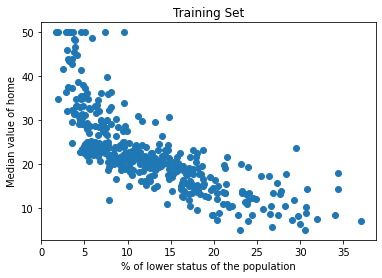

In [104]:
import matplotlib.pyplot as plt

lstat = []
temp = []
# training set
for i in range(0, len(features[0])):
    # index 12 is LSTAT
    temp.append(features[0][i][12])
lstat.append(temp)

temp = []
# testing set
for i in range(0, len(features[1])):
    # index 12 is LSTAT
    temp.append(features[1][i][12])
lstat.append(temp)

# Scatterplot
plt.scatter(lstat[0], medv[0])
plt.title("Training Set")
plt.xlabel("% of lower status of the population")
plt.ylabel("Median value of home")
plt.show()

# 4. Linear Regression
***
Using sklearn's `LinearRegression` we will return the w values and print it as an equation of MEDV as a linear function of LSTAT.

In [105]:
from sklearn.linear_model import LinearRegression

# Linear regression
def lin_reg(x_data, y_data):
    reg = LinearRegression().fit(x_data, y_data)
    w = [reg.intercept_]
    for i in range(0, len(reg.coef_)):
        w.append(reg.coef_[i])
    return w

lstat_0 = []
for i in range(0, len(lstat[0])):
    lstat_0.append([lstat[0][i]])
    
medv_0 = np.array(medv[0])
w = lin_reg(lstat_0, medv_0)
print("\033[1mMEDV as a linear function of LSTAT: \033[0m" + 
      str(w[0]) + " + " + str(w[1]) + "x")

MEDV as a linear function of LSTAT: 34.991133021969475 + -0.9809388811855762x


# 5. Fitting least squares line to the scatterplot
***
The line fits the scatterplot well, as it appeared somewhat linear as mentioned before set aside the outliers.

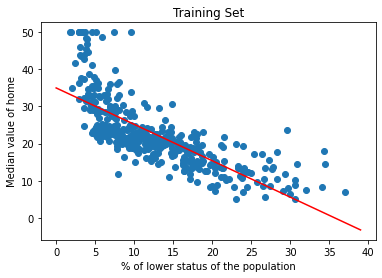

In [106]:
# Least squares line
x = np.array(range(0, 40))
y = w[1] * x + w[0]
plt.plot(x, y, color = 'red')

# Scatterplot
plt.scatter(lstat[0], medv[0])
plt.title("Training Set")
plt.xlabel("% of lower status of the population")
plt.ylabel("Median value of home")
plt.show()

# 6. Mean squared error with predict()
***
The mean squared error, using sklearn's function, is found through also using the `predict()` function from what we found before through linear regression.

In [107]:
# Linear regression
def lin_reg_predict(x_data, y_data):
    reg = LinearRegression().fit(x_data, y_data)
    p = []
    for i in range(0, len(x_data)):
        temp = reg.predict(np.array([x_data[i]]))
        p.append(temp)
    return p

# Mean squared error
from sklearn.metrics import mean_squared_error
medv_pred = lin_reg_predict(lstat_0, medv_0)
MSE = mean_squared_error(medv[0], medv_pred)
print("\033[1mMSE: \033[0m" + str(MSE))

MSE: 38.47893344802523


# 7. Repeating with testing set
***
The testing set, which contains 20% of the overall data, produces an MSE of `37.4`, which is approximately `1.1` less than the MSE of the training set.

In [108]:
# MSE of testing set
lstat_1 = []
for i in range(0, len(lstat[1])):
    lstat_1.append([lstat[1][i]])
    
medv_1 = np.array(medv[1])
medv_pred = lin_reg_predict(lstat_1, medv_1)
MSE = mean_squared_error(medv[1], medv_pred)
print("\033[1mMSE: \033[0m" + str(MSE))

MSE: 37.38430755689143


# 8. 2nd-degree MSEs
***
Using the `np.hstack()` to create a 2nd-dgree polynomial the resulting MSEs for the training and testing sets are slightly higher than the original MSEs.

In [109]:
# 2nd-degree training set
# ==============================
temp = []
for i in range(0, len(lstat_0)):
    temp.append([lstat_0[i][0] ** 2])
lstat_2 = []
lstat_2.append(np.hstack((lstat_0, temp)))

medv_pred = lin_reg_predict(lstat_2[0], medv_0)
temp = []
for i in range(0, len(medv_pred)):
    temp.append(medv_pred[i][0])
y = []
y.append(temp)

MSE = mean_squared_error(medv[0], medv_pred)
print("\033[1m2nd-degree training MSE: \033[0m" + str(MSE))

# 2nd-degree testing set
# ==============================
temp = []
for i in range(0, len(lstat_1)):
    temp.append([lstat_1[i][0] ** 2])
lstat_2.append(np.hstack((lstat_1, temp)))

medv_pred = lin_reg_predict(lstat_2[1], medv_1)
temp = []
for i in range(0, len(medv_pred)):
    temp.append(medv_pred[i][0])
y.append(temp)

MSE = mean_squared_error(medv[1], medv_pred)
print("\033[1m2nd-degree testing MSE: \033[0m" + str(MSE))

2nd-degree training MSE: 30.59851434937097
2nd-degree testing MSE: 29.15762004844459


# 9. 2nd-degree models
***
Using the `np.hstack()` to create a 2nd-dgree polynomial the resulting linear models for the training and testing set respectively are produced. The models appear to fit the data much better than the previous linear models.

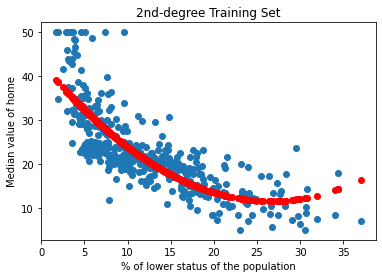

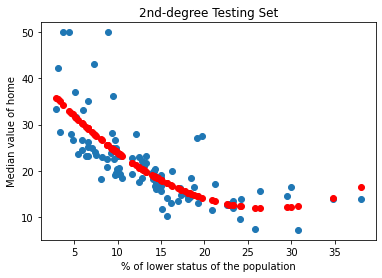

In [110]:
# 2nd-degree training set
# ==============================
# Scatterplot
plt.scatter(lstat[0], medv[0])
plt.title("2nd-degree Training Set")
plt.xlabel("% of lower status of the population")
plt.ylabel("Median value of home")

# Least squares line
x = lstat_0
plt.scatter(x, y[0], color = 'red')
plt.show()

# 2nd-degree testing set
# ==============================
# Scatterplot
plt.scatter(lstat[1], medv[1])
plt.title("2nd-degree Testing Set")
plt.xlabel("% of lower status of the population")
plt.ylabel("Median value of home")

# Least squares line
x = lstat_1
plt.scatter(x, y[1], color = 'red')
plt.show()

# 10. Using all features
***
Using all 13 features we find the equations of the training and testing sets respectively. We are also able to find the MSEs as well, which follow the same trend as the previous MSEs while being even lower than the previous, as well as the testing MSE being lower than the training.

In [111]:
# Linear regression equation
w = lin_reg(features[0], medv_0)
print("\033[1mTraining equation: \033[0m" + 
      str(round(w[0], 1)) + " + " + str(round(w[1], 1)) + "x_1" + " + " + str(round(w[2], 1)) + "x_2" + " + " + 
      str(round(w[3], 1)) + "x_3" + " + " + str(round(w[4], 1)) + "x_4" + " + " + str(round(w[5], 1)) + "x_5" + " + " + 
      str(round(w[6], 1)) + "x_6" + " + " + str(round(w[7], 1)) + "x_7" + " + " + str(round(w[8], 1)) + "x_8" + " + " + 
      str(round(w[9], 1)) + "x_9" + " + " + str(round(w[10], 1)) + "x_10" + " + " + str(round(w[11], 1)) + "x_11" + " + " + 
      str(round(w[12], 1)) + "x_12" + " + " + str(round(w[13], 1)) + "x_13")
w = lin_reg(features[1], medv_1)

print("\033[1mTeesting equation: \033[0m" + 
      str(round(w[0], 1)) + " + " + str(round(w[1], 1)) + "x_1" + " + " + str(round(w[2], 1)) + "x_2" + " + " + 
      str(round(w[3], 1)) + "x_3" + " + " + str(round(w[4], 1)) + "x_4" + " + " + str(round(w[5], 1)) + "x_5" + " + " + 
      str(round(w[6], 1)) + "x_6" + " + " + str(round(w[7], 1)) + "x_7" + " + " + str(round(w[8], 1)) + "x_8" + " + " + 
      str(round(w[9], 1)) + "x_9" + " + " + str(round(w[10], 1)) + "x_10" + " + " + str(round(w[11], 1)) + "x_11" + " + " + 
      str(round(w[12], 1)) + "x_12" + " + " + str(round(w[13], 1)) + "x_13")

# MSE
medv_pred = lin_reg_predict(features[0], medv_0)
MSE = mean_squared_error(medv[0], medv_pred)
print("\033[1mTraining MSE: \033[0m" + str(MSE))
medv_pred = lin_reg_predict(features[1], medv_1)
MSE = mean_squared_error(medv[1], medv_pred)
print("\033[1mTesting MSE: \033[0m" + str(MSE))

# 

Training equation: 34.3 + -0.1x_1 + 0.1x_2 + 0.1x_3 + 2.6x_4 + -17.3x_5 + 4.1x_6 + -0.0x_7 + -1.5x_8 + 0.3x_9 + -0.0x_10 + -0.8x_11 + 0.0x_12 + -0.5x_13
Teesting equation: 29.3 + 0.6x_1 + -0.0x_2 + -0.1x_3 + 4.3x_4 + -12.8x_5 + 3.9x_6 + 0.0x_7 + -0.8x_8 + -0.1x_9 + -0.0x_10 + -1.2x_11 + 0.0x_12 + -0.6x_13
Training MSE: 21.046340805342368
Testing MSE: 20.783626217006645


# 11. Linear Regression and MSE with 2nd-degree features
***
All features are put into a new array, which would be 13 features. Adding the 2nd-degree polynomials with `np.hstack()` will double the features to 26 features, or columns. <br>
Following the previous trend we see that the MSEs are even lower than before, where the testing set is also lower than the training.

In [112]:
# Training set
# =========================================
temp = []
# each column = 13 features
for i in range(0, len(features[0][0])):
    row = []
    # each row = len(features[0]) = 404
    for j in range(0, len(features[0])):
        row.append([features[0][j][i]])
    temp.append(row)

temp_3 = []
# each column = 13 features + each 2nd-degree = 26
for i in range(0, len(temp)):
    temp_2 = []
    # each row = len(features[0]) = 404
    for j in range(0, len(temp[i])):
        temp_2.append([temp[i][j][0] ** 2])
    temp_1 = np.hstack((temp[i], temp_2))
    
    if len(temp_3) == 0:
        temp_3 = temp_1
    else:
        temp_3 = np.hstack((temp_3, temp_1))

features_2 = []
features_2.append(temp_3)

# Equation
w = lin_reg(features_2[0], medv_0)
# Print equation
print("\033[1m2nd-degree training equation: \033[0m")
print(str(round(w[0], 2)))
counter = 1
counter2 = 1
while counter < len(w):
    print("+ " + str(round(w[counter], 2)) + "x_" + str(counter2) + " + " + 
          str(round(w[counter + 1], 3)) + "x_" + str(counter2) + "^2")
    counter += 2
    counter2 += 1

# MSE
medv_pred = lin_reg_predict(features_2[0], medv_0)
MSE = mean_squared_error(medv_0, medv_pred)
print("\033[1m2nd-degree training MSE: \033[0m" + str(MSE))
print()

# Testing set
# =========================================
temp = []
# each column = 13 features
for i in range(0, len(features[1][0])):
    row = []
    # each row = len(features[1]) = 102
    for j in range(0, len(features[1])):
        row.append([features[1][j][i]])
    temp.append(row)

temp_3 = []
# each column = 13 features + each 2nd-degree = 26
for i in range(0, len(temp)):
    temp_2 = []
    # each row = len(features[1]) = 102
    for j in range(0, len(temp[i])):
        temp_2.append([temp[i][j][0] ** 2])
    temp_1 = np.hstack((temp[i], temp_2))
    
    if len(temp_3) == 0:
        temp_3 = temp_1
    else:
        temp_3 = np.hstack((temp_3, temp_1))

features_2.append(temp_3)

# Equation
w = lin_reg(features_2[1], medv_1)
# Print equation
print("\033[1m2nd-degree testing equation: \033[0m")
print(str(round(w[0], 2)))
counter = 1
counter2 = 1
while counter < len(w):
    print("+ " + str(round(w[counter], 2)) + "x_" + str(counter2) + " + " + 
          str(round(w[counter + 1], 3)) + "x_" + str(counter2) + "^2")
    counter += 2
    counter2 += 1

# MSE
medv_pred = lin_reg_predict(features_2[1], medv_1)
MSE = mean_squared_error(medv_1, medv_pred)
print("\033[1m2nd-degree testing MSE: \033[0m" + str(MSE))

2nd-degree training equation: 
162.52
+ -0.39x_1 + 0.003x_1^2
+ -0.07x_2 + 0.001x_2^2
+ -0.2x_3 + 0.01x_3^2
+ 1.11x_4 + 1.107x_4^2
+ -28.55x_5 + 3.807x_5^2
+ -19.94x_6 + 1.78x_6^2
+ -0.02x_7 + 0.0x_7^2
+ -2.38x_8 + 0.109x_8^2
+ 0.71x_9 + -0.011x_9^2
+ -0.02x_10 + 0.0x_10^2
+ -4.92x_11 + 0.118x_11^2
+ 0.01x_12 + -0.0x_12^2
+ -1.35x_13 + 0.024x_13^2
2nd-degree training MSE: 13.508100802461712

2nd-degree testing equation: 
206.14
+ 0.7x_1 + -0.045x_1^2
+ 0.03x_2 + -0.001x_2^2
+ 0.32x_3 + -0.022x_3^2
+ 1.97x_4 + 1.969x_4^2
+ 23.65x_5 + -37.631x_5^2
+ -21.55x_6 + 2.008x_6^2
+ 0.0x_7 + -0.0x_7^2
+ -4.07x_8 + 0.336x_8^2
+ 1.09x_9 + -0.111x_9^2
+ -0.25x_10 + 0.0x_10^2
+ -7.9x_11 + 0.187x_11^2
+ 0.04x_12 + -0.0x_12^2
+ -1.08x_13 + 0.015x_13^2
2nd-degree testing MSE: 12.683058484130198


# 12. Polynomial Features
***
Using the sklearn's `PolynomialFeatures` we are able to find the model of the features with interation features. Although I am unable to plot the predicted values (red) as an actual line (instead I will represent them with `scatter()`), we can see that it appears that the data would overfit. The MSEs continues the trend of being lower than the previous, as well as the fact that the testing set is lower than the training set's MSE.

2nd-degree training MSE: 10.83019549881768



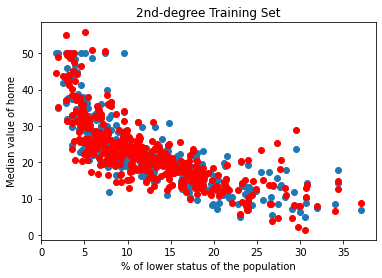

2nd-degree testing MSE: 0.17218140063982412


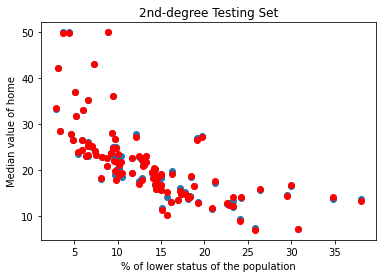

In [113]:
from sklearn.preprocessing import PolynomialFeatures

poly_0 = PolynomialFeatures(degree = 2)
poly_0 = poly_0.fit_transform(features[0])

poly_1 = PolynomialFeatures(degree = 2)
poly_1 = poly_1.fit_transform(features[1])

# 2nd-degree training set
# ==============================   
# MSE
medv_pred = lin_reg_predict(poly_0, medv_0)
MSE = mean_squared_error(medv_0, medv_pred)
print("\033[1m2nd-degree training MSE: \033[0m" + str(MSE))
print()

# Scatterplot
plt.scatter(lstat[0], medv[0])
plt.title("2nd-degree Training Set")
plt.xlabel("% of lower status of the population")
plt.ylabel("Median value of home")

# Least squares line
temp = []
for i in range(0, len(medv_pred)):
    temp.append(medv_pred[i][0])
y = []
y.append(temp)

x = lstat_0
plt.scatter(x, y[0], color = 'red')
plt.show()


# 2nd-degree testing set
# ==============================
# # Equation
# w = lin_reg(poly_0, medv_0)
# # Print equation
# print("\033[1m2nd-degree testing equation: \033[0m")
# print(str(round(w[0], 2)))
# counter = 1
# counter2 = 1
# while counter < len(w):
#     print("+ " + str(round(w[counter], 2)) + "x_" + str(counter2) + " + " + 
#           str(round(w[counter + 1], 3)) + "x_" + str(counter2) + "^2")
#     counter += 2
#     counter2 += 1
    
# MSE
medv_pred = lin_reg_predict(poly_1, medv_1)
MSE = mean_squared_error(medv_1, medv_pred)
print("\033[1m2nd-degree testing MSE: \033[0m" + str(MSE))

# Scatterplot
plt.scatter(lstat[1], medv[1])
plt.title("2nd-degree Testing Set")
plt.xlabel("% of lower status of the population")
plt.ylabel("Median value of home")

# Least squares line
temp = []
for i in range(0, len(medv_pred)):
    temp.append(medv_pred[i][0])
y.append(temp)

x = lstat_1
plt.scatter(x, y[1], color = 'red')
plt.show()